In [1]:
import pandas as pd
import os
dataset_path = 'dataset'


In [2]:
silver_df = pd.read_parquet(os.path.join(dataset_path, 'silver_df.parquet'))
silver_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269728 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   ID      269728 non-null  int64   
 1   Name    269728 non-null  object  
 2   Sex     269728 non-null  category
 3   Age     260414 non-null  Int8    
 4   Height  210917 non-null  Int16   
 5   Weight  208204 non-null  float32 
 6   Team    269728 non-null  category
 7   NOC     269728 non-null  category
 8   Games   269728 non-null  category
 9   Year    269728 non-null  uint16  
 10  Season  269728 non-null  category
 11  City    269728 non-null  category
 12  Sport   269728 non-null  category
 13  Event   269728 non-null  category
 14  Medal   39772 non-null   category
dtypes: Int16(1), Int8(1), category(9), float32(1), int64(1), object(1), uint16(1)
memory usage: 12.2+ MB


In [3]:
from IPython.display import display
from pandasql import sqldf
import numpy as np
pysqldf = lambda q: sqldf(q, globals())

query_missing = 'SELECT silver_df.Year, COUNT(1) AS total_entries, missing_height, missing_weight' \
               ' FROM silver_df' \
               ' LEFT JOIN ' \
               ' (SELECT Year, COUNT(*) AS missing_height' \
               ' FROM silver_df' \
               ' WHERE Height IS NULL' \
               ' GROUP BY Year' \
               ' ORDER BY Year ASC) missingH' \
               ' ON silver_df.Year = missingH.Year' \
               ' LEFT JOIN ' \
               ' (SELECT Year, COUNT(*) AS missing_weight' \
               ' FROM silver_df' \
               ' WHERE Weight IS NULL' \
               ' GROUP BY Year' \
               ' ORDER BY Year ASC) missingW' \
               ' ON silver_df.Year = missingW.Year' \
               ' GROUP BY silver_df.Year' \
               ' ORDER BY silver_df.Year DESC'
gold_missing_data_df = pysqldf(query_missing)
display(gold_missing_data_df)

,Year,total_entries,missing_height,missing_weight
0,2016,13688,176,223
1,2014,4891,20,218
2,2012,12920,168,360
3,2010,4402,2,24
4,2008,13602,151,159
5,2006,4382,6,16
6,2004,13443,36,37
7,2002,4109,29,47
8,2000,13821,123,126
9,1998,3605,84,86


<AxesSubplot:xlabel='Year'>

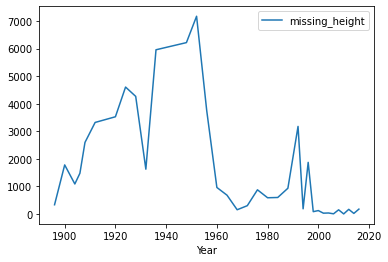

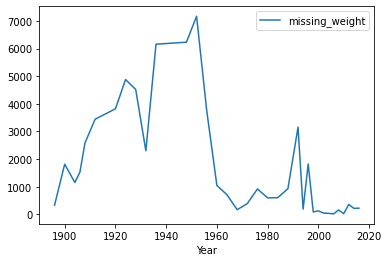

In [4]:
gold_missing_data_df[['Year','missing_height']].plot(x='Year')
gold_missing_data_df[['Year','missing_weight']].plot(x='Year')
